In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load datasets from ../datasets/
aqi = pd.read_csv(r'C:\Users\hites\AirPure_MarketFit_Project\data\aqi.csv')
population = pd.read_csv(r'C:\Users\hites\AirPure_MarketFit_Project\data\population_projection.csv')
idsp = pd.read_csv(r'C:\Users\hites\AirPure_MarketFit_Project\data\idsp.csv', encoding='ISO-8859-1')
vahan = pd.read_csv(r'C:\Users\hites\AirPure_MarketFit_Project\data\vahan.csv')  # EV vehicle data


In [4]:
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235785 entries, 0 to 235784
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   date                           235785 non-null  object 
 1   state                          235785 non-null  object 
 2   area                           235785 non-null  object 
 3   number_of_monitoring_stations  235785 non-null  int64  
 4   prominent_pollutants           235785 non-null  object 
 5   aqi_value                      235785 non-null  int64  
 6   air_quality_status             235785 non-null  object 
 7   unit                           235785 non-null  object 
 8   note                           0 non-null       float64
dtypes: float64(1), int64(2), object(6)
memory usage: 16.2+ MB


In [5]:
aqi.head(50)

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,note
0,30-04-2025,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
1,30-04-2025,Bihar,Purnia,1,CO,56,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
2,30-04-2025,Madhya Pradesh,Katni,1,O3,98,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
3,30-04-2025,Chhattisgarh,Tumidih,1,PM10,103,Moderate,number_of_monitoring_stations in Absolute Numb...,NaN
4,30-04-2025,Assam,Byrnihat,1,PM2.5,61,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
5,30-04-2025,Manipur,Imphal,1,SO2,106,Moderate,number_of_monitoring_stations in Absolute Numb...,NaN
6,30-04-2025,Kerala,Kollam,1,PM10,73,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
7,30-04-2025,West Bengal,Barrackpore,1,PM10,68,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
8,30-04-2025,Odisha,Nayagarh,1,PM10,58,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
9,30-04-2025,Assam,Nalbari,1,PM10,39,Good,number_of_monitoring_stations in Absolute Numb...,NaN


In [6]:
aqi.describe()

,number_of_monitoring_stations,aqi_value,note
count,235785.000000,235785.000000,0.0
mean,1.870653,111.127294,NaN
std,3.071575,71.447353,NaN
min,1.000000,3.000000,NaN
25%,1.000000,59.000000,NaN
50%,1.000000,92.000000,NaN
75%,1.000000,142.000000,NaN
max,40.000000,500.000000,NaN


In [7]:
aqi['date'] = pd.to_datetime(aqi['date'], errors='coerce') 

In [8]:
aqi.isnull().sum()

date                                  0
state                                 0
area                                  0
number_of_monitoring_stations         0
prominent_pollutants                  0
aqi_value                             0
air_quality_status                    0
unit                                  0
note                             235785
dtype: int64

In [9]:
# Ensure datetime format
aqi['date'] = pd.to_datetime(aqi['date'])

# Filter date range
aqi_filtered = aqi[(aqi['date'] >= '2024-12-01') & (aqi['date'] <= '2025-05-31')]


In [10]:
# Group by area and calculate average AQI
area_avg_aqi = (
    aqi_filtered.groupby('area')['aqi_value']
    .mean()
    .sort_values()
)


In [11]:
# Bottom 5 areas (best air)
bottom_5 = area_avg_aqi.head(5)
print("Bottom 5 Areas with Best Average AQI:")
print(bottom_5)

# Top 5 areas (worst air)
top_5 = area_avg_aqi.tail(5)
print("\nTop 5 Areas with Worst Average AQI:")
print(top_5)


Bottom 5 Areas with Best Average AQI:
area
Tirunelveli       33.310078
Palkalaiperur     42.794872
Madikeri          42.951049
Vijayapura        44.328767
Chamarajanagar    44.807692
Name: aqi_value, dtype: float64

Top 5 Areas with Worst Average AQI:
area
Gurugram       204.143836
Bahadurgarh    226.437500
Hajipur        233.666667
Delhi          238.920000
Byrnihat       284.194915
Name: aqi_value, dtype: float64


### Q1


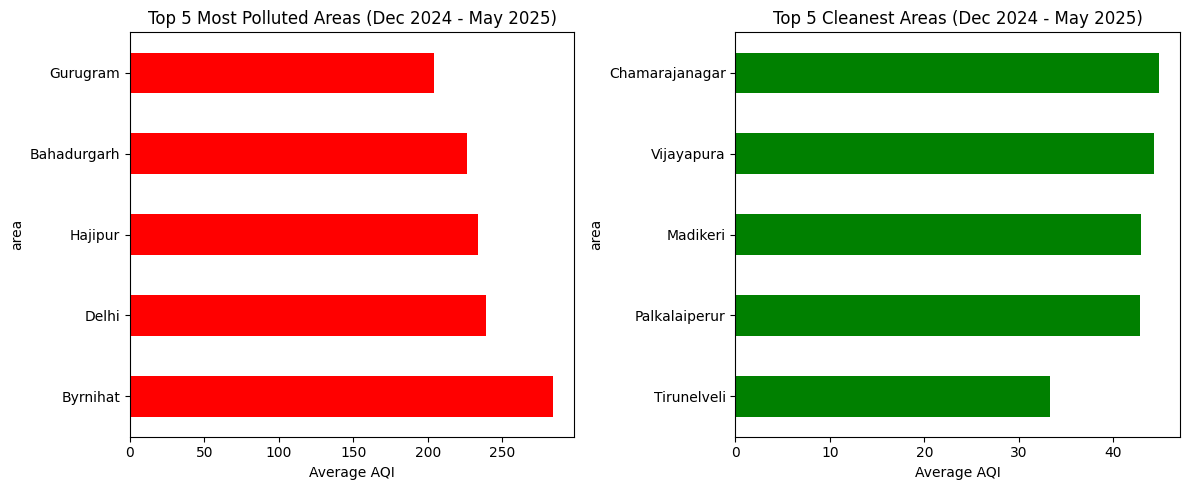

In [12]:
import os

# Ensure output directory exists
os.makedirs('../outputs/dashboard', exist_ok=True)

plt.figure(figsize=(12, 5))

# Top 5
plt.subplot(1, 2, 1)
top_5.plot(kind='barh', color='red')
plt.title('Top 5 Most Polluted Areas (Dec 2024 - May 2025)')
plt.xlabel('Average AQI')
plt.gca().invert_yaxis()

# Bottom 5
plt.subplot(1, 2, 2)
bottom_5.plot(kind='barh', color='green')
plt.title('Top 5 Cleanest Areas (Dec 2024 - May 2025)')
plt.xlabel('Average AQI')

plt.tight_layout()
plt.savefig('../outputs/dashboard/q1_top_bottom_5_areas.png')
plt.show()


### Filter for Southern States

### Q2

In [13]:
south_states = ['Andhra Pradesh', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Telangana']


In [14]:
aqi['date'] = pd.to_datetime(aqi['date'])
aqi_2022_onwards = aqi[aqi['date'] >= '2022-01-01']


In [15]:
south_aqi = aqi_2022_onwards[aqi_2022_onwards['state'].isin(south_states)]


In [16]:
from collections import Counter

def extract_pollutants(group):
    all_pollutants = []
    for pollutants in group['prominent_pollutants']:
        if pd.notnull(pollutants):
            all_pollutants.extend(pollutants.split(', '))
    return Counter(all_pollutants)

# Create dictionary: state → Counter(pollutants)
state_pollutant_counter = {
    state: extract_pollutants(south_aqi[south_aqi['state'] == state])
    for state in south_states
}


In [17]:
pollutant_summary = []

for state, counter in state_pollutant_counter.items():
    sorted_pollutants = counter.most_common()
    top_2 = sorted_pollutants[:2]
    bottom_2 = sorted_pollutants[-2:] if len(sorted_pollutants) >= 4 else []
    
    pollutant_summary.append({
        'State': state,
        'Top 2 Pollutants': [p[0] for p in top_2],
        'Bottom 2 Pollutants': [p[0] for p in bottom_2]
    })

import pandas as pd
pollutant_df = pd.DataFrame(pollutant_summary)
pollutant_df


,State,Top 2 Pollutants,Bottom 2 Pollutants
0,Andhra Pradesh,"[PM10, PM2.5]","[PM10,NO2,O3, PM2.5,CO,O3]"
1,Karnataka,"[PM10, CO]","[PM10,PM2.5,SO2, PM10,NO2,SO3]"
2,Kerala,"[PM10, PM2.5]","[SO2, CO,O3]"
3,Tamil Nadu,"[PM10, PM2.5]","[PM2.5,CO,NO2, PM2.5,NH3,CO]"
4,Telangana,"[PM2.5,PM10, PM10]","[CO,O3, NO2]"


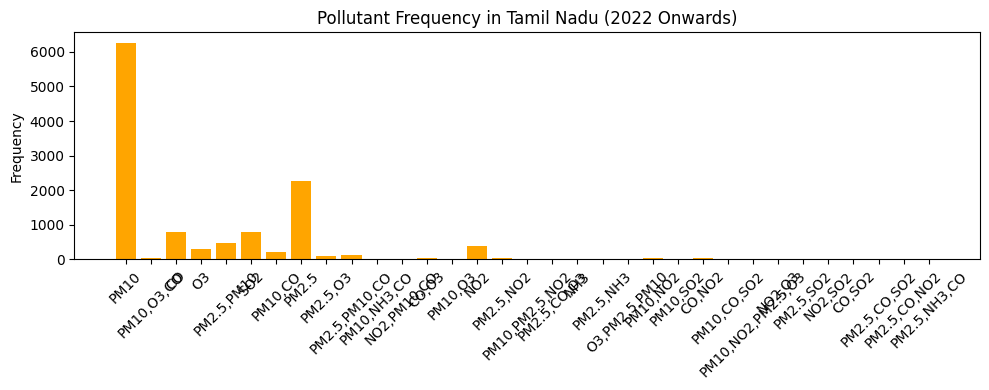

In [18]:
import matplotlib.pyplot as plt

state = 'Tamil Nadu'
state_counts = state_pollutant_counter[state]

plt.figure(figsize=(10, 4))
plt.bar(state_counts.keys(), state_counts.values(), color='orange')
plt.title(f'Pollutant Frequency in {state} (2022 Onwards)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'../outputs/dashboard/q2_{state.lower().replace(" ", "_")}_pollutants.png')
plt.show()


In [19]:
pollutant_summary = []

for state, counter in state_pollutant_counter.items():
    # Convert to sorted list of (pollutant, count)
    sorted_pollutants = sorted(counter.items(), key=lambda x: x[1], reverse=True)
    
    # Remove duplicates while keeping order
    seen = set()
    unique_sorted = [(p, c) for p, c in sorted_pollutants if not (p in seen or seen.add(p))]
    
    top_2 = [p[0] for p in unique_sorted[:2]]
    bottom_2 = [p[0] for p in unique_sorted[-2:]] if len(unique_sorted) >= 4 else [p[0] for p in unique_sorted[-2:]]

    pollutant_summary.append({
        'State': state,
        'Top 2 Pollutants': top_2,
        'Bottom 2 Pollutants': bottom_2
    })

pollutant_df = pd.DataFrame(pollutant_summary)
pollutant_df


,State,Top 2 Pollutants,Bottom 2 Pollutants
0,Andhra Pradesh,"[PM10, PM2.5]","[PM10,NO2,O3, PM2.5,CO,O3]"
1,Karnataka,"[PM10, CO]","[PM10,PM2.5,SO2, PM10,NO2,SO3]"
2,Kerala,"[PM10, PM2.5]","[SO2, CO,O3]"
3,Tamil Nadu,"[PM10, PM2.5]","[PM2.5,CO,NO2, PM2.5,NH3,CO]"
4,Telangana,"[PM2.5,PM10, PM10]","[CO,O3, NO2]"


In [20]:
from collections import Counter

def extract_pollutants(group):
    all_pollutants = []
    for entry in group['prominent_pollutants']:
        if pd.notnull(entry):
            all_pollutants.extend([p.strip() for p in entry.split(',')])
    return Counter(all_pollutants)

pollutant_summary = []

for state in south_states:
    state_data = south_aqi[south_aqi['state'] == state]
    pollutant_counter = extract_pollutants(state_data)
    
    # Sort pollutants by frequency
    sorted_pollutants = sorted(pollutant_counter.items(), key=lambda x: x[1], reverse=True)
    
    # Remove duplicates in list, just in case
    seen = set()
    unique_sorted = [(p, c) for p, c in sorted_pollutants if not (p in seen or seen.add(p))]
    
    # Extract clean top and bottom 2
    top_2 = [p[0] for p in unique_sorted[:2]]
    bottom_2 = [p[0] for p in unique_sorted[-2:] if len(unique_sorted) >= 4]

    pollutant_summary.append({
        'State': state,
        'Top 2 Pollutants': top_2,
        'Bottom 2 Pollutants': bottom_2
    })

# Final DataFrame
pollutant_df = pd.DataFrame(pollutant_summary)
pollutant_df


,State,Top 2 Pollutants,Bottom 2 Pollutants
0,Andhra Pradesh,"[PM10, PM2.5]","[NO2, SO2]"
1,Karnataka,"[PM10, CO]","[NH3, SO3]"
2,Kerala,"[PM10, PM2.5]","[NH3, SO2]"
3,Tamil Nadu,"[PM10, PM2.5]","[NO2, NH3]"
4,Telangana,"[PM10, PM2.5]","[O3, NO2]"


### Q3

In [21]:
import datetime

# Define list of metro cities
metro_cities = ['Delhi', 'Mumbai', 'Chennai', 'Kolkata', 'Bengaluru', 'Hyderabad', 'Ahmedabad', 'Pune']

# Filter AQI for last 1 year
one_year_ago = pd.to_datetime('today') - pd.DateOffset(years=1)
aqi_last_year = aqi[aqi['date'] >= one_year_ago]

# Filter for metro cities
metro_aqi = aqi_last_year[aqi_last_year['area'].isin(metro_cities)]


In [22]:
# Add day of week and weekend flag
metro_aqi['day_of_week'] = metro_aqi['date'].dt.day_name()
metro_aqi['day_type'] = metro_aqi['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')


In [23]:
city_daytype_avg = (
    metro_aqi.groupby(['area', 'day_type'])['aqi_value']
    .mean()
    .reset_index()
    .pivot(index='area', columns='day_type', values='aqi_value')
    .reset_index()
)

# Add difference column
city_daytype_avg['AQI_Difference'] = city_daytype_avg['Weekday'] - city_daytype_avg['Weekend']
city_daytype_avg


day_type,area,Weekday,Weekend,AQI_Difference
0,Ahmedabad,114.923077,117.583333,-2.660256
1,Bengaluru,75.576923,75.714286,-0.137363
2,Chennai,72.927885,68.619048,4.308837
3,Delhi,215.298077,201.523810,13.774267
4,Hyderabad,81.418269,81.523810,-0.105540
5,Kolkata,100.841346,100.357143,0.484203
6,Mumbai,97.225962,99.345238,-2.119277
7,Pune,108.000000,106.535714,1.464286


<Figure size 1000x600 with 0 Axes>

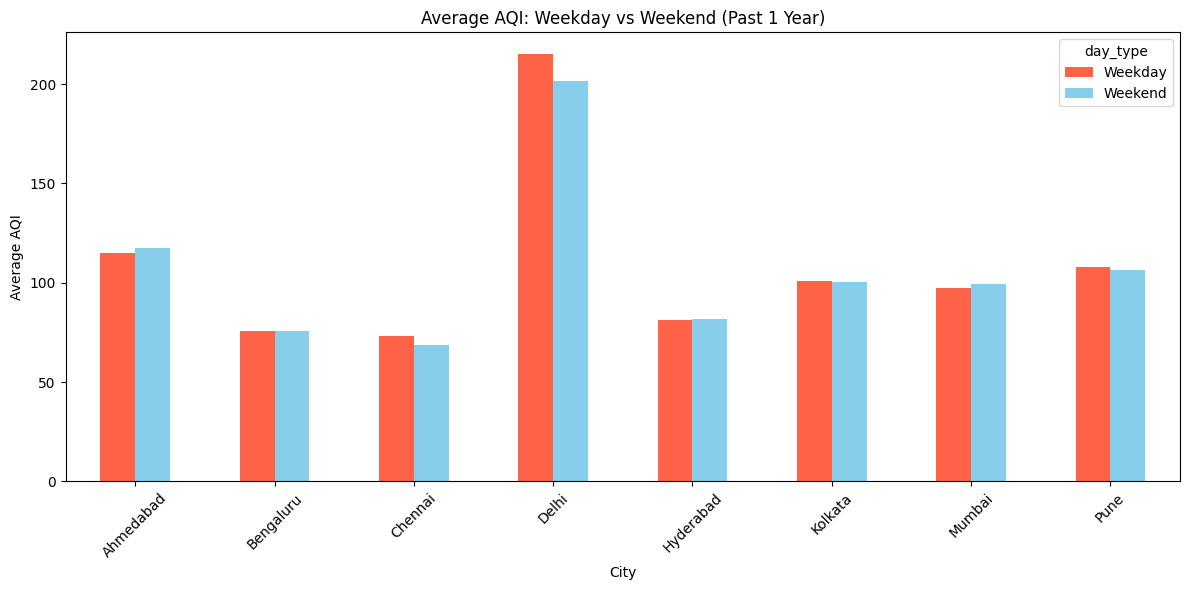

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
city_daytype_avg.set_index('area')[['Weekday', 'Weekend']].plot(kind='bar', figsize=(12, 6), color=['tomato', 'skyblue'])

plt.title('Average AQI: Weekday vs Weekend (Past 1 Year)')
plt.ylabel('Average AQI')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.tight_layout()

# Save chart
import os
os.makedirs('../outputs/dashboard', exist_ok=True)
plt.savefig('../outputs/dashboard/q3_weekday_vs_weekend_aqi.png')
plt.show()


In [25]:
#📊 Insights to Add to Your Dashboard or Report
#Delhi shows the most significant improvement (−13 AQI points) on weekends → possibly due to reduced vehicle emissions.

#Ahmedabad & Mumbai have slightly higher pollution on weekends → could be due to local factors (e.g. industrial zones, tourist traffic).

#Overall, 4 cities improve, 4 worsen/stay the same

In [26]:
city_daytype_avg.to_csv('../outputs/dashboard/q3_weekday_weekend_clean.csv', index=False)


### Q4

In [27]:
# Group by state and count distinct areas
state_area_counts = aqi.groupby('state')['area'].nunique().sort_values(ascending=False)

# Top 10 states
top_10_states = state_area_counts.head(10).index.tolist()
print("Top 10 States:", top_10_states)


Top 10 States: ['Rajasthan', 'Maharashtra', 'Karnataka', 'Tamil Nadu', 'Haryana', 'Bihar', 'Uttar Pradesh', 'Odisha', 'Madhya Pradesh', 'Andhra Pradesh']


In [28]:
top_states_aqi = aqi[aqi['state'].isin(top_10_states)].copy()


In [29]:
top_states_aqi['month'] = top_states_aqi['date'].dt.strftime('%Y-%m')  # format like '2025-01'


In [30]:
monthly_aqi = (
    top_states_aqi.groupby(['state', 'month'])['aqi_value']
    .mean()
    .reset_index()
)


In [31]:
# Get top 3 worst months for each state
worst_months = (
    monthly_aqi.sort_values(['state', 'aqi_value'], ascending=[True, False])
    .groupby('state')
    .head(3)
)

worst_months


,state,month,aqi_value
9,Andhra Pradesh,2023-01,121.229508
10,Andhra Pradesh,2023-02,118.809756
33,Andhra Pradesh,2025-01,114.185930
45,Bihar,2022-12,339.768202
46,Bihar,2023-01,325.876352
44,Bihar,2022-11,274.001471
93,Haryana,2023-11,265.600579
105,Haryana,2024-11,232.424107
81,Haryana,2022-11,219.879589
121,Karnataka,2023-02,89.737762


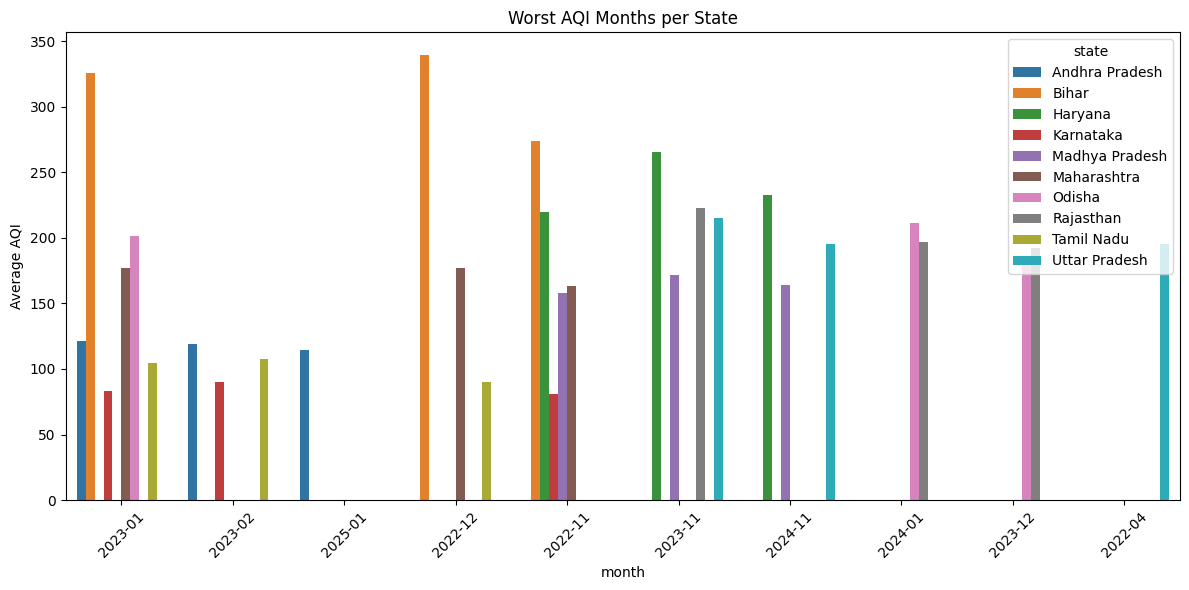

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=worst_months, x='month', y='aqi_value', hue='state')
plt.title('Worst AQI Months per State')
plt.xticks(rotation=45)
plt.ylabel('Average AQI')
plt.tight_layout()
plt.savefig('../outputs/dashboard/q4_worst_aqi_months_chart.png')
plt.show()


In [33]:
worst_months.to_csv('../outputs/dashboard/q4_worst_months_per_state.csv', index=False)


### Q5

In [34]:
# Make sure date column is in datetime format
aqi['date'] = pd.to_datetime(aqi['date'])

# Filter for Bengaluru and date range
bengaluru_aqi = aqi[
    (aqi['area'] == 'Bengaluru') &
    (aqi['date'] >= '2025-03-01') &
    (aqi['date'] <= '2025-05-31')
]


In [35]:
# Drop duplicates in case multiple entries exist per day
bengaluru_aqi_unique = bengaluru_aqi.drop_duplicates(subset='date')

# Count occurrences of each air quality category
category_counts = bengaluru_aqi_unique['air_quality_status'].value_counts().reset_index()
category_counts.columns = ['AQI Category', 'Days']
category_counts


,AQI Category,Days
0,Satisfactory,48
1,Moderate,13


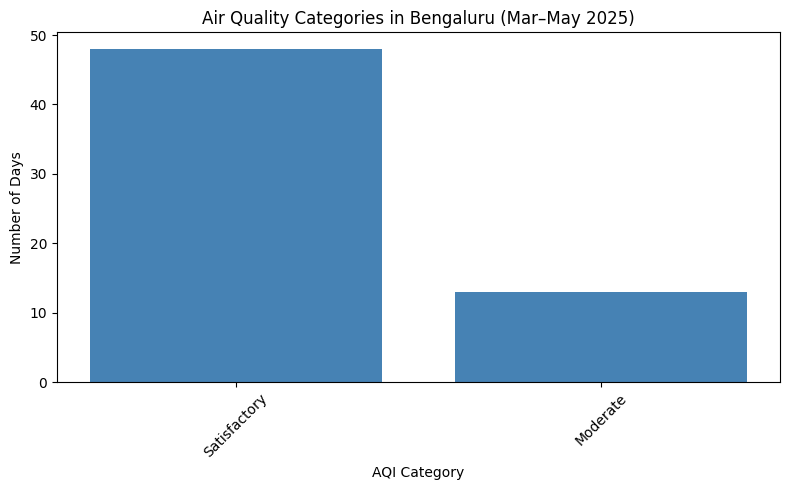

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(category_counts['AQI Category'], category_counts['Days'], color='steelblue')
plt.title('Air Quality Categories in Bengaluru (Mar–May 2025)')
plt.ylabel('Number of Days')
plt.xlabel('AQI Category')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the figure
import os
os.makedirs('../outputs/dashboard', exist_ok=True)
plt.savefig('../outputs/dashboard/q5_bengaluru_aqi_category_counts.png')
plt.show()



In [37]:
category_counts.to_csv('../outputs/dashboard/q5_bengaluru_aqi_category_counts.csv', index=False)


### Q6 Objective

In [38]:
idsp = pd.read_csv('../data/idsp.csv', encoding='ISO-8859-1')  # or cp1252 if needed


In [39]:
idsp.head()



,year,week,outbreak_starting_date,reporting_date,state,district,disease_illness_name,status,cases,deaths,unit,note
0,2025,16,15-04-2025,15-04-2025,Andhra Pradesh,Kakinada,Acute Diarrheal Disease,Reported,22,0,"cases in absolute number, deaths in absolute n...",NaN
1,2025,16,15-04-2025,17-04-2025,Assam,Biswanath,Chickenpox,Reported,1,1,"cases in absolute number, deaths in absolute n...",NaN
2,2025,16,19-04-2025,20-04-2025,Assam,Dhemaji,Food Poisoning,Reported,16,0,"cases in absolute number, deaths in absolute n...",NaN
3,2025,16,19-04-2025,19-04-2025,Bihar,Gopalganj,Fever with Rash,Reported,5,0,"cases in absolute number, deaths in absolute n...",NaN
4,2025,16,12-04-2025,15-04-2025,Bihar,Madhubani,Acute Diarrheal Disease,Reported,21,0,"cases in absolute number, deaths in absolute n...",NaN


In [40]:
health_recent = idsp[(idsp['year'] >= 2022) & (idsp['year'] <= 2025)].copy()


In [41]:
disease_counts = (
    health_recent.groupby(['state', 'disease_illness_name'])['cases']
    .sum()
    .reset_index()
    .rename(columns={'disease_illness_name': 'disease_name'})
)


In [42]:
disease_counts['rank'] = disease_counts.groupby('state')['cases'].rank(method='first', ascending=False)
top_2_diseases = disease_counts[disease_counts['rank'] <= 2].drop(columns='rank')


In [43]:
aqi['date'] = pd.to_datetime(aqi['date'])
aqi_recent = aqi[aqi['date'] >= '2022-01-01']
state_avg_aqi = (
    aqi_recent.groupby('state')['aqi_value']
    .mean()
    .reset_index()
    .rename(columns={'aqi_value': 'average_aqi'})
)


In [44]:
final_q6 = pd.merge(top_2_diseases, state_avg_aqi, on='state', how='left')
final_q6.head()


,state,disease_name,cases,average_aqi
0,Andaman and Nicobar Islands,Acute Diarrheal Disease,117,57.706897
1,Andaman and Nicobar Islands,Fever with Rash,8,57.706897
2,Andhra Pradesh,Acute Diarrheal Disease,3311,77.507701
3,Andhra Pradesh,Cholera,1081,77.507701
4,Arunachal,Rabies,1,NaN


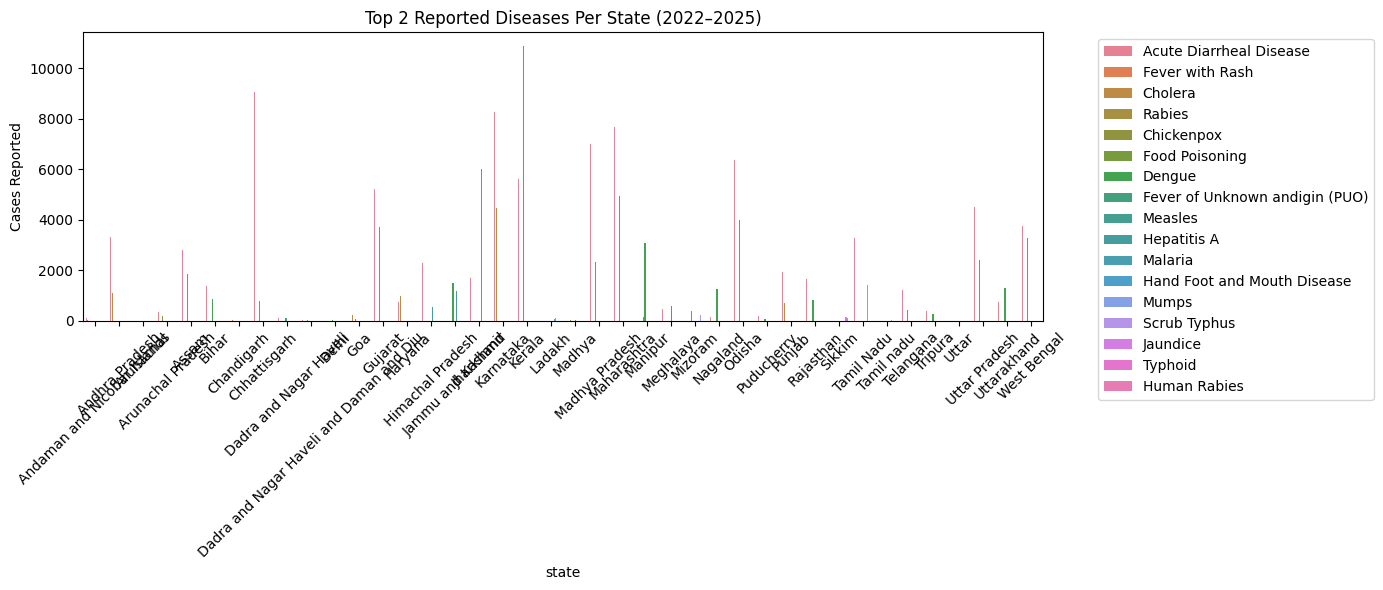

In [56]:
plt.figure(figsize=(14, 6))
sns.barplot(data=final_q6, x='state', y='cases', hue='disease_name')
plt.title('Top 2 Reported Diseases Per State (2022–2025)')
plt.ylabel('Cases Reported')
plt.xticks(rotation=45)

# Move legend to right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('../outputs/dashboard/q6_top_diseases_chart.png', bbox_inches='tight')
plt.show()



In [57]:
import os
os.makedirs('../outputs/dashboard', exist_ok=True)
final_q6.to_csv('../outputs/dashboard/q6_top2_diseases_with_aqi.csv', index=False)


### Q7 Objective

In [48]:
#Compare average AQI between states with high EV (Electric Vehicle) 
#adoption and those with low adoption, using data from 2022–2025.

In [49]:
vahan = pd.read_csv('../data/vahan.csv')
vahan.head()



,year,month,state,rto,vehicle_class,fuel,value,unit,note
0,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,BUS,DIESEL,2,value in Absolute Number,NaN
1,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,GOODS CARRIER,DIESEL,23,value in Absolute Number,NaN
2,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,GOODS CARRIER,PETROL,1,value in Absolute Number,NaN
3,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,M-CYCLE/SCOOTER,ELECTRIC(BOV),1,value in Absolute Number,NaN
4,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,M-CYCLE/SCOOTER,PETROL,387,value in Absolute Number,NaN


In [50]:
ev = pd.read_csv('../data/vahan.csv')  # already loaded, skip if done
ev_electric = ev[
    (ev['fuel'].str.upper().str.contains('ELECTRIC')) &
    (ev['year'] >= 2022) & 
    (ev['year'] <= 2025)
]


In [51]:
ev_by_state = ev_electric.groupby('state')['value'].sum().reset_index()
ev_by_state = ev_by_state.sort_values(by='value', ascending=False)


In [52]:
top_5_states = ev_by_state.head(5)['state'].tolist()
bottom_5_states = ev_by_state.tail(5)['state'].tolist()

print("Top 5 EV States:", top_5_states)
print("Bottom 5 EV States:", bottom_5_states)


Top 5 EV States: ['Uttar Pradesh', 'Maharashtra', 'Karnataka', 'Bihar', 'Tamil Nadu']
Bottom 5 EV States: ['Ladakh', 'Arunachal Pradesh', 'Nagaland', 'Lakshadweep', 'Sikkim']


In [53]:
aqi['date'] = pd.to_datetime(aqi['date'])
aqi_recent = aqi[aqi['date'] >= '2022-01-01']

state_avg_aqi = (
    aqi_recent.groupby('state')['aqi_value']
    .mean()
    .reset_index()
    .rename(columns={'aqi_value': 'average_aqi'})
)


In [54]:
ev_compare_states = top_5_states + bottom_5_states

ev_aqi_comparison = state_avg_aqi[state_avg_aqi['state'].isin(ev_compare_states)].copy()

ev_aqi_comparison['EV Adoption'] = ev_aqi_comparison['state'].apply(
    lambda x: 'High EV Adoption' if x in top_5_states else 'Low EV Adoption'
)


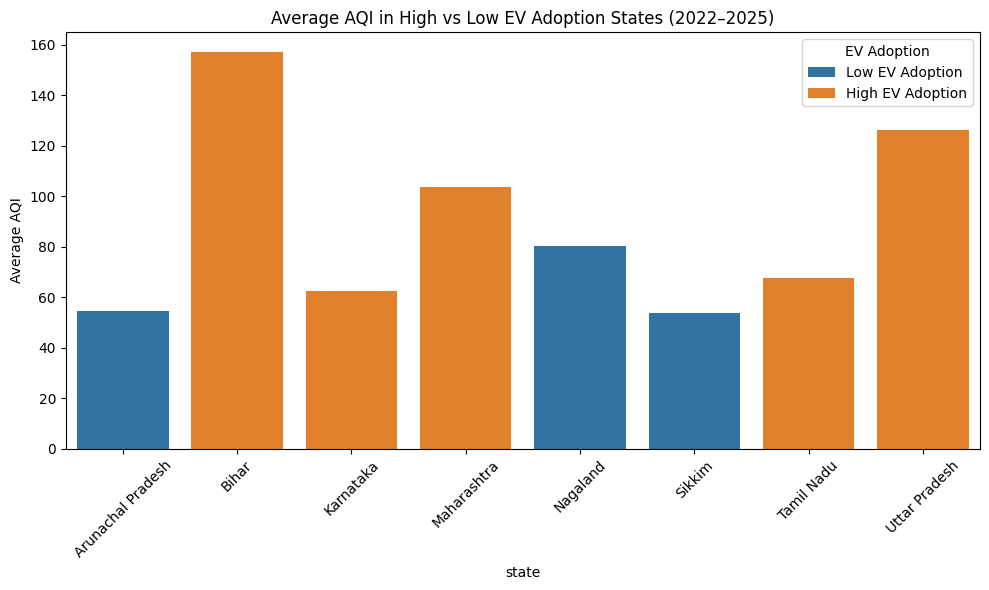

In [55]:
import os
os.makedirs('../outputs/dashboard', exist_ok=True)

# Save
ev_aqi_comparison.to_csv('../outputs/dashboard/q7_ev_vs_aqi.csv', index=False)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=ev_aqi_comparison, x='state', y='average_aqi', hue='EV Adoption')
plt.title('Average AQI in High vs Low EV Adoption States (2022–2025)')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../outputs/dashboard/q7_ev_vs_aqi_chart.png')
plt.show()
